In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import random


## LOADING DATA

Changing Directory

In [32]:
path=r"C:\Users\Eduardo\Documents\datasets\flowers\10_proced_data"
os.chdir(path)
print(os.getcwd()) #lets make sure we are in the correct directory

C:\Users\Eduardo\Documents\datasets\flowers\10_proced_data


Loading X and y

In [33]:
pickle_in = open("X.pickle","rb")  # using reading bits
X  = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")  # using reading bits
y  = pickle.load(pickle_in)

Getting to know the data

In [34]:
print("DATA: \n")
print("X shape : {}".format(X.shape))
print("y shape : {}  (ONE HOT ENCODED) \n".format(y.shape))
print("SIZE OF DATA EXAMPLES : {}".format(X.shape[0]))
print("PIXELS :                {}".format(X.shape[1]))
print("CHANNELS (RGB) :        {}".format(X.shape[2]))

DATA: 

X shape : (4323, 100, 100, 3)
y shape : (4323, 5)  (ONE HOT ENCODED) 

SIZE OF DATA EXAMPLES : 4323
PIXELS :                100
CHANNELS (RGB) :        100


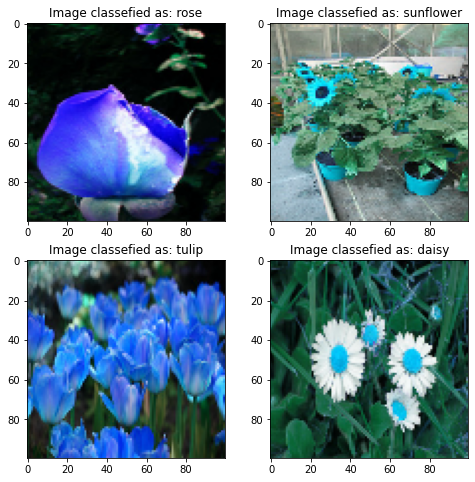

In [35]:
categories = ["daisy","dandelion","rose","sunflower","tulip"]
randomList = random.sample(range(0, X.shape[0]), 4)

plt.figure(figsize=(8, 8))

for i, n in enumerate(randomList):
    ica = np.argmax(y[n])
    plt.subplot(2, 2, i+1)
    plt.title('Image classefied as: {}'.format(categories[ica]))
    plt.imshow(X[n])


Now lets unroll the data so we can plug it in into a fully connected network

In [36]:
 from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_train = y_train.T
y_test = y_test.T

#Unroll
train_x_flatten =  X_train.reshape( X_train.shape[0], -1).T  
test_x_flatten = X_test.reshape(X_test.shape[0], -1).T
# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.


print ("X_train's shape: " + str(X_train.shape))
print ("train_x's shape: " + str(train_x.shape))
print ("y_train's shape: " + str(y_train.shape))
print("\n")
print ("X_test's shape: " + str(X_test.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("y_test's shape: " + str(y_test.shape))

X_train's shape: (2896, 100, 100, 3)
train_x's shape: (30000, 2896)
y_train's shape: (5, 2896)


X_test's shape: (1427, 100, 100, 3)
test_x's shape: (30000, 1427)
y_test's shape: (5, 1427)


# LETS START MODELING

## FUNCTIONS

In [38]:
def cost(AL,Y):
    m = Y.shape[1]
    #cost = - (1./m) *(Y * np.log(AL)).sum()
    cost = -np.mean(Y * np.log(AL + 1e-8))
    cost = np.squeeze(cost)      
    return cost


def initialize_parameters(n_x, n_h, n_y):

    #np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters  

## Two layer model

In [39]:
Xm=train_x_flatten 
ym=y_train
m = ym.shape[1]

n0=Xm.shape[0]
n1= 40  # number of active node in hidden layer 1
n_y = ym.shape[0]
print("layers_dims = ",n0,',' ,n1,',' ,n_y)
parameters = initialize_parameters(n0, n1, n_y)

layers_dims =  30000 , 40 , 5


In [40]:
# MetaParameters
W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]
#HYperParameters
learning_rate = 0.000001
epochs=10
iter_count=[]
costs=[]

In [41]:
for epoch in range(epochs):
    Z1 = W1.dot(Xm)+b1
    A1 = np.maximum(0,Z1)
    Z2 = W2.dot(A1) + b2
    A2 = np.exp(Z2)/np.exp(Z2).sum(axis=1,keepdims=True)

   # dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))  #dJ/dA2
    dZ2 = (A2 - ym) #dA2 * Z2 * (1-Z2)                    
    dW2 = (1/m)*dZ2.dot(A1.T)                           
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)

    dA1 = W2.T.dot(dZ2)
    dZ1 = np.array(dA1, copy=True)
    dZ1[Z1 <= 0] = 0
   
    
    dW1 = (1/m)*dZ1.dot(Xm.T)                           
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True) 

     # Gradient descent

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2


In [42]:
P = np.argmax(A2, axis=0)
T = np.argmax(ym,axis=0)
Accuracy = (T==P).astype(int)
Accuracy = (Accuracy.sum()/m)*100

In [43]:
Accuracy

17.61049723756906

# 3 Layer Neuron

In [108]:
n0=train_x_flatten.shape[0]
n1=  40 # number of active node in hidden layer 1
n2 = 20
n3 = 5
n_y = y_train.shape[0]
print("                                  DIMENSIONS:")
print("Neural Architecture: = ",n0,'-->' ,n1,'-->' ,n2,'-->',n3,'-->',n_y)

  ###  DATA SET ###
Y = y_train
X = train_x_flatten 
m = train_x.shape[1]
iter_count=[]
costs=[]
learning_rate = 0.1

   ### METAPARAMETERS ###
W1 = np.random.randn(40, 30000)*0.01
b1 = np.zeros((40, 1))
W2 = np.random.randn( 20 , 40)*0.01
b2 = np.zeros(( 20 , 1))
W3 = np.random.randn(20,20)*0.01
b3 = np.zeros((20, 1))
W4 = np.random.randn(5, 20)*0.01
b4 = np.zeros((5, 1))

                                  DIMENSIONS:
Neural Architecture: =  30000 --> 40 --> 20 --> 5 --> 5


In [109]:
for epoch in range(0, 10):
    ### FeedForward
    Z1 = W1.dot(X)+b1
    A1 = np.maximum(0,Z1)

    Z2 = W2.dot(A1)+b2
    A2 = np.maximum(0,Z2)

    Z3 = W3.dot(A2)+b3
    A3 = np.maximum(0,Z3)

    Z4 = W4.dot(A3)+b4
    A4 = np.exp(Z4)/np.exp(Z4).sum(axis=1,keepdims=True)

    if epoch % 1 == 0:
        costs.append(cost(A4,Y))
        iter_count.append(epoch)

    ### Back prop
    dZ4 = (A4-Y)
    dW4 = (1/m)*dZ4.dot(A3.T) 
    db4 = (1/m)*np.sum(dZ4,axis=1,keepdims=True)

    dA3 = W4.T.dot(dZ4)
    dZ3 = np.array(dA3, copy=True)
    dZ3[Z3 <= 0] = 0
    dW3 = (1/m)*dZ3.dot(A2.T) 
    db3 = (1/m)*np.sum(dZ3,axis=1,keepdims=True)

    dA2 = W3.T.dot(dZ3)
    dZ2 = np.array(dA2, copy=True)
    dZ2[Z2 <= 0] = 0
    dW2 = (1/m)*dZ2.dot(A1.T) 
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)


    dA1 = W2.T.dot(dZ2)
    dZ1 = np.array(dA1, copy=True)
    dZ1[Z1 <= 0] = 0
    dW1 = (1/m)*dZ1.dot(X.T) 
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)

    W1=W1-learning_rate*dW1
    W2=W2-learning_rate*dW2
    W3=W3-learning_rate*dW3
    W4=W4-learning_rate*dW4
    b1=b1-learning_rate*b1
    b2=b2-learning_rate*b2
    b3=b3-learning_rate*b3
    b4=b4-learning_rate*b4


C:\Users\Eduardo\Documents\CARRERA\Udemy\Deep_Learning_Prerequisites_The_Numpy_Stack_in_Python\machine_learning_env\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
C:\Users\Eduardo\Documents\CARRERA\Udemy\Deep_Learning_Prerequisites_The_Numpy_Stack_in_Python\machine_learning_env\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
C:\Users\Eduardo\Documents\CARRERA\Udemy\Deep_Learning_Prerequisites_The_Numpy_Stack_in_Python\machine_learning_env\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Eduardo\Documents\CARRERA\Udemy\Deep_Learning_Prerequisites_The_Numpy_Stack_in_Python\machine_learning_env\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Eduardo\Documents\CARRERA\Udemy\Deep_Learning_Prerequisites_The_Numpy_Stack_in_Python\machine_learning

In [110]:
P = np.argmax(A4, axis=0)
T = np.argmax(Y,axis=0)
Accuracy = (T==P).astype(int)
Accuracy = (Accuracy.sum()/m)*100
Accuracy

18.577348066298345

In [111]:
costs

[1.5940837053367833,
 1.5941648629770262,
 1.9709801784172716,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]